In [2]:
# general libs we'll use
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## here have a temporal epoch set up to work for the first and last frequencies that we're looking at (here 10 and 30hz) and an epoch that is not appropriate for the middle frequency (here kind of randomly chosen as 20.77Hz for an example). Note the crisp peaks around 10hz and 30hz because these are accurately sampled in the freq domain whereas the middle frequency (20.77hz) is not only attenuated but it is smeared out into neighboring frequency bands. 

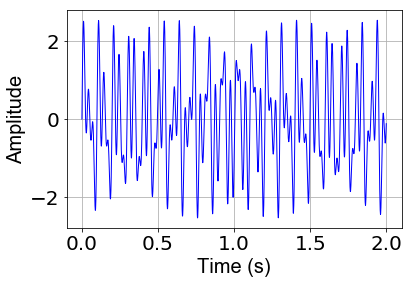

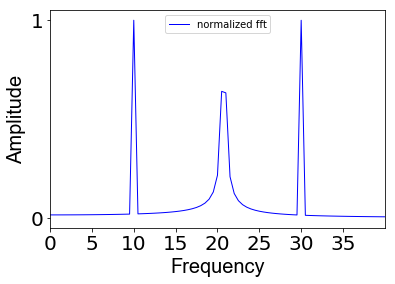

In [9]:
# make a new signal to FFT...combo of sin waves
sr = 1024                       # samp rate in Hz
f = np.array([10,20.75,30])     # frequency of signal 
amp = np.array([1,1,1])
tmax = 2                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
t = np.arange(0,tmax,dt)        # time axis

# make a more complex sin wave
sw = amp[0]*np.sin(2*pi*f[0]*t)+amp[1]*np.sin(2*pi*f[1]*t)+amp[2]*np.sin(2*pi*f[2]*t)

# plot the signal...
plt.plot(t, sw, 'b-', linewidth = 1)    
plt.xlabel('Time (s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(np.arange(0,tmax+.5,.5), color='k', size=20)
plt.yticks((-2,0,2), color='k', size=20)
plt.grid(1)
plt.show()

sp = np.fft.rfft(sw)             # normalize by the number of data points, which is dividing by number of positive frequencies or just dt
amp = (np.abs(sp) / len(sw)) *2
freq = np.fft.rfftfreq(sw.size, dt)   # Sample spacing is 2nd arg, inverse of the sampling rate. Defaults to 1!
plt.plot(freq, amp, 'b', linewidth=1)            # plot amplitude (power = np.absolute(sp)**2)
plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(freq[0:80:10], color='k', size=20)
plt.yticks((0,1), color='k', size=20)
plt.xlim([0, 40])
plt.show()

In [13]:
freq[1:10:2]

array([0.5, 1.5, 2.5, 3.5, 4.5])